# Random Forest Model Selection process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [2]:
#### Configure path
trainPath = "~/Final/FinalTrainingSet.csv"
testPath = "~/Final/FinalTestSet.csv"

In [3]:
train = pd.read_csv(trainPath)

In [4]:
unique_users = train.user_id.unique()
print("We have data for", len(unique_users), "users")

('We have data for', 80000, 'users')


In [6]:
test = pd.read_csv(testPath)
unique_users = test.user_id.unique()
print("We have data for", len(unique_users), "users")

('We have data for', 10527, 'users')


In [8]:
print("Train size:", train.shape[0])
print("Test size:", test.shape[0])

('Train size:', 495745)
('Test size:', 41597)


In [23]:
#  Missing values for origin destination
313361-199463

113898

In [ ]:
missing_count = train.count(axis=0)
missing = pd.DataFrame(missing_count)
missing

#### We will fit multiple Random Forest Models. We also use Random Forest variable importance as a tool for variable selection

### Model 1 : All Raw features

In [10]:
rawPredictors = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region',
                 'user_location_city', 'orig_destination_distance', 'user_id','is_mobile', 'is_package', 'channel',
                 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt','srch_destination_id', 'srch_destination_type_id', 'is_booking',
                  'cnt', 'hotel_continent', 'hotel_country', 'hotel_market']

In [11]:
print("We used", len(rawPredictors), "original features(excluding date/time) for the building first model")

('We used', 20, 'original features(excluding date/time) for the building first model')


In [12]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

model1_RF= RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)
cvScoreRF1 = cross_validation.cross_val_score(model1_RF, train[rawPredictors], train['hotel_cluster'], cv=5)
cvScoreRF1

array([ 0.05831409,  0.06052998,  0.05928332,  0.06102334,  0.05539467])

In [15]:
print("Cross Validation score for Model-1 is(in %) :")
print(cvScoreRF1*100)    
print("Mean cross validation score is:", cvScoreRF1.mean()*100)

Cross Validation score for Model-1 is(in %) :
[ 5.83140936  6.05299776  5.92833153  6.1023344   5.53946744]
('Mean cross validation score is:', 5.8909081002555892)


For the first model, we take all the raw features and number of trees = 5. We will adjust the tuning
parameters in the later step. As of now, lets observe the feature importance graph and see which features were important during tree building 
process. We first fit random forest model 

In [17]:
model1_RF.fit(train[rawPredictors], train['hotel_cluster'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

#### Fetaure Importance Graph Model - 1 Original features

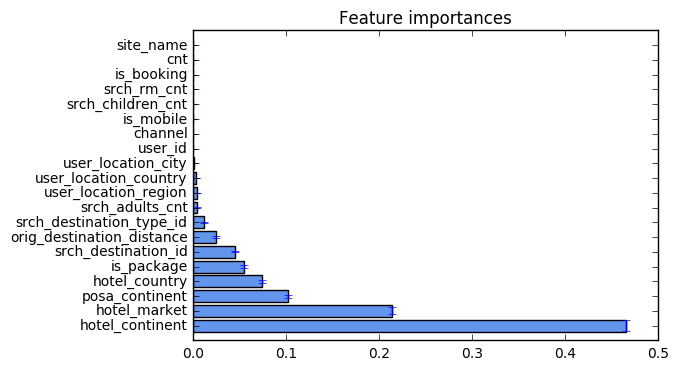

In [18]:
importances = model1_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(rawPredictors)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')

impFeatures = []
for i in indices:
    impFeatures.append(rawPredictors[i])
    
plt.yticks(range(len(rawPredictors)), impFeatures)
plt.ylim([-1, len(rawPredictors)])
plt.show()

In [19]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model1_RF.feature_importances_), rawPredictors), 
             reverse=True)

Features sorted by their score:
[(0.4655, 'hotel_continent'), (0.214, 'hotel_market'), (0.1013, 'posa_continent'), (0.0735, 'hotel_country'), (0.0543, 'is_package'), (0.0444, 'srch_destination_id'), (0.0243, 'orig_destination_distance'), (0.0115, 'srch_destination_type_id'), (0.0043, 'srch_adults_cnt'), (0.0036, 'user_location_region'), (0.0029, 'user_location_country'), (0.0004, 'user_location_city'), (0.0, 'user_id'), (0.0, 'srch_rm_cnt'), (0.0, 'srch_children_cnt'), (0.0, 'site_name'), (0.0, 'is_mobile'), (0.0, 'is_booking'), (0.0, 'cnt'), (0.0, 'channel')]


In [43]:
impFeatureSet1 = ['hotel_continent', 'hotel_market',  'posa_continent', 'hotel_country', 'is_package', 'srch_destination_id'
                 , 'orig_destination_distance', 'srch_destination_type_id', 'user_location_region', 
                 'srch_adults_cnt', 'user_location_region', 'user_location_country', 'user_location_city']

### Model 2 : IMP features

Model using only imp features 

In [21]:
model2_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)
cvScoreRF2 = cross_validation.cross_val_score(model2_RF, train[impFeatureSet1], train['hotel_cluster'], cv=5)
cvScoreRF2

array([ 0.06225614,  0.06468429,  0.06393279,  0.06016585,  0.06188261])

In [23]:
model2_RF.fit(train[impFeatureSet1], train['hotel_cluster'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

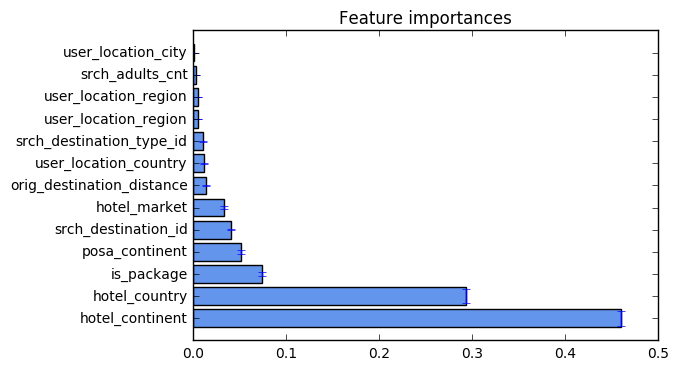

In [24]:
importances = model2_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(impFeatureSet1)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(impFeatureSet1[i])
    
plt.yticks(range(len(impFeatureSet1)), impFeatures)
plt.ylim([-1, len(impFeatureSet1)])
plt.show()

In [25]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model2_RF.feature_importances_), impFeatureSet1), 
             reverse=True)

Features sorted by their score:
[(0.4594, 'hotel_continent'), (0.2927, 'hotel_country'), (0.0741, 'is_package'), (0.0517, 'posa_continent'), (0.0405, 'srch_destination_id'), (0.0334, 'hotel_market'), (0.0137, 'orig_destination_distance'), (0.0115, 'user_location_country'), (0.0099, 'srch_destination_type_id'), (0.0049, 'user_location_region'), (0.0046, 'user_location_region'), (0.0029, 'srch_adults_cnt'), (0.0006, 'user_location_city')]


In [44]:
# Note: We arrange all the variable by their importance to try combinatory effect of them
# Important than set -1
impFeatureSet2 = ['hotel_continent', 'hotel_country', 'is_package', 'posa_continent', 'srch_destination_id',
                 'hotel_market', 'orig_destination_distance', 'user_location_country', 'srch_destination_type_id',
               'user_location_region', 'user_location_region', 'srch_adults_cnt', 'user_location_city']

In [26]:
print("Cross Validation score for Model-2 is(in %) :")
print(cvScoreRF2*100)    
print("Mean cross validation score is:", cvScoreRF2.mean()*100)

Cross Validation score for Model-2 is(in %) :
[ 6.22561424  6.46842923  6.39327894  6.01658495  6.18826117]
('Mean cross validation score is:', 6.2584337064284385)


cv score improved by only 1% using model with imp feature!

### Model 3: Feature engineering Set-1
We now introduce some new features created using approach explained in ~/Final/FeatureEngScript2.R
https://bhd2.rcg.usm.maine.edu:8888/edit/Final/FeatureEngScript2.R

We introduced features created by discretization 

In [28]:
# We don't use year and hour. Since, all the training data is from 2013 
# We do not year, month, hour: Since we created fetures from them
fatureEng1 = [    'part_of_day', 'type_of_day', 'season', 
                  'duration_of_stay', 'is_alone', 
                  'dest_feature_pc1', 'dest_feature_pc2', 'dest_feature_pc3' ]


### Use label Encoder for deal with categorical variable

In [29]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['season', 'type_of_day', 'part_of_day', 'duration_of_stay', 'is_alone']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [30]:
train.shape

(495745, 56)

In [34]:
train.iloc[1:5, 30:37]

,part_of_day,type_of_day,season,is_alone,dest_feature_pc1,dest_feature_pc2,dest_feature_pc3
1,0,1,1,0,45.864357,4.72233,-10.897558
2,2,1,3,0,45.864357,4.72233,-10.897558
3,1,1,0,0,45.864357,4.72233,-10.897558
4,1,1,0,0,45.864357,4.72233,-10.897558


In [35]:
model3_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)
cvScoreRF3 = cross_validation.cross_val_score(model3_RF, train[fatureEng1], train['hotel_cluster'], cv=5)
cvScoreRF3

array([ 0.06731729,  0.0699276 ,  0.07026656,  0.07054658,  0.06483901])

In [36]:
model3_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)
model3_RF.fit(train[fatureEng1], train['hotel_cluster'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

Ater introducing this new variables, we see better cross validation scores. Lets fit the model 4 by coming these new features and 
old imp features.


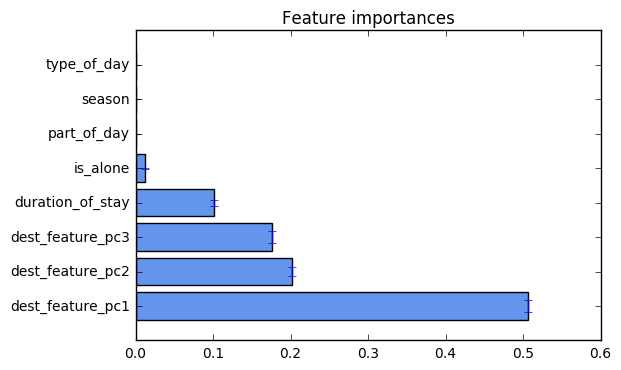

In [37]:
importances = model3_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(fatureEng1)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(fatureEng1[i])
    
plt.yticks(range(len(fatureEng1)), impFeatures)
plt.ylim([-1, len(fatureEng1)])
plt.show()

In [38]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model3_RF.feature_importances_), fatureEng1), 
             reverse=True)

Features sorted by their score:
[(0.5068, 'dest_feature_pc1'), (0.2023, 'dest_feature_pc2'), (0.1761, 'dest_feature_pc3'), (0.1006, 'duration_of_stay'), (0.012, 'is_alone'), (0.0011, 'part_of_day'), (0.0008, 'season'), (0.0002, 'type_of_day')]


In [39]:
impFeatureSet3 = ['dest_feature_pc1', 'dest_feature_pc2', 'dest_feature_pc3', 'duration_of_stay', 'is_alone']

In [90]:
print("Cross Validation score for Model-3 is(in %) :")
print(cvScoreRF3*100)    
print("Mean cross validation score is:", cvScoreRF3.mean()*100)

Cross Validation score for Model-3 is(in %) :
[ 6.73172896  6.9927602   7.02665631  7.05465771  6.48390124]
('Mean cross validation score is:', 6.8579408828356145)


### Model 4 : Iteration 4 
    

In [40]:
uniqueHc_ids = len(train.hotel_country.unique())
uniqueHm_ids = len(train.hotel_market.unique())
uniqueHcont_ids = len(train.hotel_continent.unique())
print("unique values for Hotel country, market and continent are as:",uniqueHc_ids,  uniqueHm_ids, uniqueHcont_ids, "respt" )

('unique values for Hotel country, market and continent are as:', 192, 2014, 7, 'respt')


In [41]:
## Encode these categorical varibles
from sklearn.preprocessing import LabelEncoder
var_mod = ['hotel_market', 'hotel_continent', 'hotel_market']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [56]:
allImp12 = list(set(impFeatureSet1 + impFeatureSet2))

In [57]:
allImp12

['hotel_continent',
 'srch_destination_id',
 'user_location_country',
 'srch_adults_cnt',
 'srch_destination_type_id',
 'is_package',
 'posa_continent',
 'hotel_market',
 'hotel_country',
 'user_location_city',
 'user_location_region',
 'orig_destination_distance']

In [58]:
model4_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)
cvScoreRF4 = cross_validation.cross_val_score(model4_RF, train[allImp12], train['hotel_cluster'], cv=5)
cvScoreRF4

array([ 0.06438344,  0.06863694,  0.06600034,  0.06314186,  0.06055072])

In [59]:
model4_RF.fit(train[allImp12], train['hotel_cluster'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

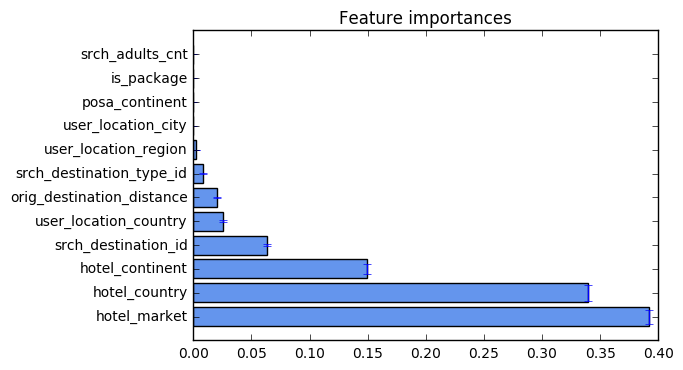

In [60]:
importances = model4_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model4_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(allImp12)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(allImp12[i])
    
plt.yticks(range(len(allImp12)), impFeatures)
plt.ylim([-1, len(allImp12)])
plt.show()

In [61]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model4_RF.feature_importances_), allImp12), 
             reverse=True)

Features sorted by their score:
[(0.3917, 'hotel_market'), (0.3396, 'hotel_country'), (0.1491, 'hotel_continent'), (0.0633, 'srch_destination_id'), (0.0254, 'user_location_country'), (0.0203, 'orig_destination_distance'), (0.008, 'srch_destination_type_id'), (0.0026, 'user_location_region'), (0.0001, 'user_location_city'), (0.0, 'srch_adults_cnt'), (0.0, 'posa_continent'), (0.0, 'is_package')]


In [71]:
impFeatureSet3 = ['hotel_market', 'hotel_country', 'hotel_continent', 'srch_destination_id', 'user_location_country',
              'orig_destination_distance',  'srch_destination_type_id',  'user_location_region']

In [91]:
print("Cross Validation score for Model-4 is(in %) :")
print(cvScoreRF4*100)    
print("Mean cross validation score is:", cvScoreRF4.mean()*100)

Cross Validation score for Model-4 is(in %) :
[ 6.43834373  6.86369411  6.60003429  6.31418599  6.05507179]
('Mean cross validation score is:', 6.4542659831356097)


Next, we introduce features created by book and clicks score:

In [106]:
train.columns.values

array(['Unnamed: 0', 'user_location_country', 'hotel_cluster',
       'user_location_region', 'user_location_city', 'hotel_country',
       'hotel_market', 'srch_destination_id', 'date_time', 'site_name',
       'posa_continent', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
       'year', 'month', 'day', 'hour', 'part_of_day', 'type_of_day',
       'season', 'is_alone', 'dest_feature_pc1', 'dest_feature_pc2',
       'dest_feature_pc3', 'clickRate', 'bookRate', 'clickMRate',
       'bookMRate', 'clickHCRate', 'bookHCRate', 'clickURate', 'bookURate',
       'clickUCRRate', 'bookUCRRate', 'clickUCRate', 'bookUCRate',
       'popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count', 'duration_of_stay'], dtyp

In [63]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['user_location_country',  'user_location_region', 'user_location_city']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [66]:
ratesUVar=['clickRate', 'bookRate','bookHCRate', 'bookURate',
                'user_location_country',  'user_location_region', 'user_location_city' ]

In [67]:
model5_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)

cvScoreRF5 = cross_validation.cross_val_score(model5_RF, train[ratesUVar], train['hotel_cluster'], cv=5)
cvScoreRF5

array([ 0.1048222 ,  0.09925989,  0.09710442,  0.09043036,  0.09624951])

In [72]:
model5_RF.fit(train[ratesUVar], train['hotel_cluster'])
test_score = model5_RF.score(test[ratesUVar], test['hotel_cluster'])
print("accuracy score for test data Model 5 (in %) is:",test_score*100)

('accuracy score for test data Model 5 (in %) is:', 2.1948698223429575)


##### Book/click Rate not proven useful!! Test Accuracy is very bad!

###  Model 6: PopularityScore Variables

In each iteration, RF cv score slighly improving. Now, in step, we observe, what variables appear as important in for each of these 
model 5 models. Then we tried balance user atributes, hotel attributes, destination attributes and fit another model


In [73]:
popularityVar = ['popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count'] 

In [76]:
model6_RF = RandomForestClassifier(n_estimators=5, min_weight_fraction_leaf=0.1, random_state=3)

cvScoreRF6 = cross_validation.cross_val_score(model6_RF, train[popularityVar], train['hotel_cluster'], cv=5)
cvScoreRF6

array([ 0.06833557,  0.07410208,  0.072909  ,  0.07058693,  0.05856297])

In [77]:
model6_RF.fit(train[popularityVar], train['hotel_cluster'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [82]:
model6_RF.fit(train[popularityVar], train['hotel_cluster'])
test_score = model6_RF.score(test[popularityVar], test['hotel_cluster'])
print("accuracy score for test - Model 6(in %) is:",test_score*100)

('accuracy score for test - Model 6(in %) is:', 7.6471860951510928)


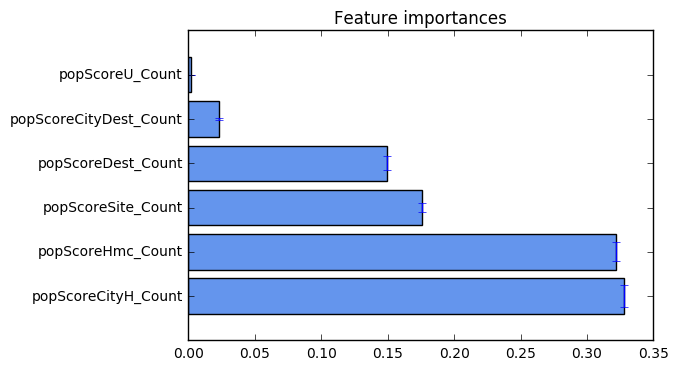

In [83]:
importances = model6_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model6_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.barh(range(len(popularityVar)), importances[indices], yerr=std[indices], align="center", color='cornflowerblue')
impFeatures=[]
for i in indices:
    impFeatures.append(popularityVar[i])
    
plt.yticks(range(len(popularityVar)), impFeatures)
plt.ylim([-1, len(popularityVar)])
plt.show()

In [84]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), model4_RF.feature_importances_), popularityVar), 
             reverse=True)

Features sorted by their score:
[(0.1491, 'popScoreHmc_Count'), (0.0633, 'popScoreU_Count'), (0.0254, 'popScoreSite_Count'), (0.008, 'popScoreCityDest_Count'), (0.0, 'popScoreDest_Count'), (0.0, 'popScoreCityH_Count')]


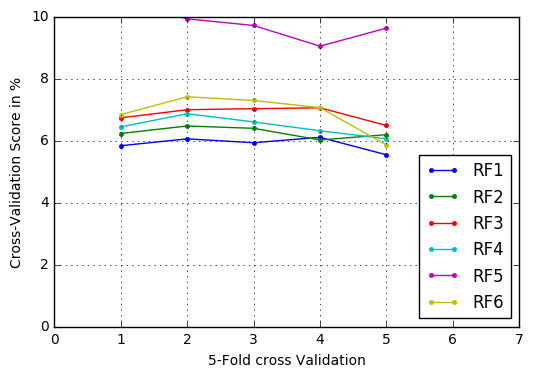

In [92]:
'Cross Validation Score Plot for the Models'
#Plot Cross Validation Score
import matplotlib.pyplot as plt
plt.xlim(*(0,7))
ylim=(0, 10)
plt.ylim(*ylim)
crossValScores = [cvScoreRF1, cvScoreRF2, cvScoreRF3, cvScoreRF4, cvScoreRF5, cvScoreRF6]
labels = ['RF1', 'RF2', 'RF3', 'RF4', 'RF5', 'RF6']
crossValInPercent = [x * 100 for x in crossValScores]
for value, label in zip(crossValInPercent, labels):
    plt.plot([1, 2, 3, 4, 5],value, '.-', label=label)
plt.grid()
plt.ylabel('Cross-Validation Score in %')
plt.xlabel('5-Fold cross Validation')
plt.legend(loc = 4)
plt.show()

### Binary Random Forest

After trying everything we could not improve the performance of random forest classifier. Next step, we will try to fit binary 
classifier instead of the multi-class and try to combine the output

In [93]:
unique_clusters = train['hotel_cluster'].unique()
len(unique_clusters)
prob_booking = []

In [144]:
train_c = train

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from itertools import chain

"Fit 100 Binary classifier with target as hotel_cluster_specific Vs NONE  i.e. 1 or 0"
for cluster in unique_clusters:
    train_c.is_copy = False
    train_c["target"] = 1
    train_c["target"][train_c["hotel_cluster"] != cluster] = 0
    probs = []
    cv = KFold(len(train_c["target"]), n_folds=3)
    binaryRF = RandomForestClassifier(n_estimators=10, min_weight_fraction_leaf=0.1)
    for i, (tr, te) in enumerate(cv):
        binaryRF.fit(train_c[final_set].iloc[tr], train_c["target"].iloc[tr])
        preds = binaryRF.predict_proba(train_c[allImp12].iloc[te])
        probs.append([p[1] for p in preds])             
    full_probs = chain.from_iterable(probs)
    prob_booking.append(list(full_probs))

/home/ec2-user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
prediction_frame = pd.DataFrame(prob_booking).T

In [147]:
prediction_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.003360,0.000002,0.013897,0.004964,0.001322,0.013505,0.002491,0.009748,0.011244,0.007897,...,0.005265,0.007079,0.007709,0.013304,0.004703,0.008409,0.012018,0.000093,0.004229,0.013725
1,0.008708,0.008594,0.006599,0.003688,0.000846,0.010517,0.002403,0.004909,0.008244,0.006311,...,0.007128,0.007085,0.014762,0.017053,0.016459,0.026570,0.009346,0.023139,0.016359,0.015837
2,0.007832,0.045401,0.004749,0.002975,0.000858,0.011119,0.002421,0.004265,0.005073,0.005286,...,0.004020,0.004382,0.015320,0.016480,0.011096,0.016770,0.005567,0.073473,0.024310,0.013680
3,0.005797,0.045401,0.002844,0.002538,0.000633,0.003134,0.000800,0.000681,0.003244,0.004145,...,0.004020,0.002306,0.012764,0.027152,0.011888,0.030783,0.004544,0.079395,0.026443,0.015477
4,0.005805,0.045401,0.003235,0.002498,0.000633,0.005986,0.000767,0.000978,0.004248,0.004145,...,0.004403,0.002306,0.009521,0.018866,0.011888,0.030783,0.004639,0.079395,0.026443,0.022258


In [148]:
def find_top_5(row):
    return list(row.nlargest(5).index)
preds = []
for index, row in prediction_frame.iterrows():
    preds.append(find_top_5(row))

In [150]:
import ml_metrics as metrics
metrics.mapk([[l] for l in train_c["hotel_cluster"]], preds, k=5)

0.017849725116768841

Result of binary classifiers is even worst. So we do not try to improve this model. 


Next, step for random forest classifier is tune some parameters. We will try to increase number of trees for model 6 and hope
for the improvement. Before this, lets check model perform on the test data.


### Try to tune Tree sizes

In [94]:
cv_scores_trees ={}
test_scores_tress={}
train_score_trees = {}
for tree_size in [5, 10, 30, 50, 100, 150]:
        modelN_RF = RandomForestClassifier(n_estimators=tree_size, min_weight_fraction_leaf=0.1)
        cvScoreRF = cross_validation.cross_val_score(modelN_RF, train[fatureEng1], train['hotel_cluster'], cv=5)
        cv_scores_trees[tree_size]=cvScoreRF
        modelN_RF.fit(train[fatureEng1], train['hotel_cluster'])
        trainSocre = modelN_RF.score(train[fatureEng1], train['hotel_cluster'])
        testScore = modelN_RF.score(test[fatureEng1], test['hotel_cluster'])    
        train_score_trees[tree_size] = trainSocre
        test_scores_tress[tree_size]=testScore

In [95]:
cv_scores_trees

{5: array([ 0.06618811,  0.06961502,  0.07002451,  0.06230454,  0.06447577]),
 10: array([ 0.06471614,  0.06833444,  0.06664582,  0.06876097,  0.06503072]),
 30: array([ 0.06388942,  0.06794119,  0.06842089,  0.06809515,  0.06742208]),
 50: array([ 0.07192475,  0.06823361,  0.07218283,  0.06783286,  0.07021704]),
 100: array([ 0.06359704,  0.07081493,  0.07055905,  0.06610778,  0.06447577]),
 150: array([ 0.06483713,  0.06928227,  0.06676685,  0.06614813,  0.06828983])}

In [96]:
test_scores_tress

{5: 0.064115200615428997,
 10: 0.063081472221554441,
 30: 0.060268769382407383,
 50: 0.066086496622352567,
 100: 0.061230377190662787,
 150: 0.065004687838065248}

In [97]:
train_score_trees 

{5: 0.06978386065416696,
 10: 0.068107595638886922,
 30: 0.064853906746411963,
 50: 0.070314375334093127,
 100: 0.066154978870185274,
 150: 0.071040555124106147}

In [98]:
### Mean Cv score
mean_cv = []
for key, value in cv_scores_trees.items():
    p = np.mean(value)
    mean_cv.append(p)

In [99]:
mean_cv 

[0.06711091444638155,
 0.066521589555252114,
 0.066697620604626209,
 0.070078217480815941,
 0.067064842164034202,
 0.067153747886859752]

In [100]:
mean_cvPer = [x * 100 for x in mean_cv] 
mean_cvPer

[6.7110914446381553,
 6.652158955525211,
 6.6697620604626211,
 7.0078217480815939,
 6.7064842164034202,
 6.7153747886859749]

In [101]:
# get % train score for each trees
import math
trainScorePer = []
for key, value in train_score_trees.items():
    p = math.ceil(value*100*100)/100
    trainScorePer.append(p)
trainScorePer    

[6.62, 6.98, 6.82, 7.04, 7.11, 6.49]

In [102]:
import math
testScorePer = []
for key, value in test_scores_tress.items():
    p = math.ceil(value*100*100)/100
    testScorePer.append(p)
testScorePer    

[6.13, 6.42, 6.31, 6.61, 6.51, 6.03]

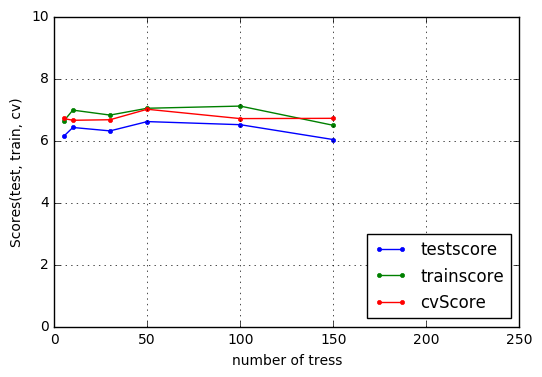

In [103]:
#Plot Cross Validation Score
import matplotlib.pyplot as plt
plt.xlim(*(0,250))
ylim=(0, 10)
plt.ylim(*ylim)
#labels = ["testscore", "trainscore", "cvScore"]
plt.plot([5, 10, 30, 50, 100, 150],testScorePer, '.-', label='testscore')
plt.plot([5, 10, 30, 50, 100, 150],trainScorePer, '.-', label='trainscore')
plt.plot([5, 10, 30, 50, 100, 150],mean_cvPer, '.-', label='cvScore')
plt.grid()
plt.ylabel('Scores(test, train, cv)')
plt.xlabel('number of tress')
plt.legend(loc = 4)
plt.show()

### Conclusion: Model 3 and Model 6 performances are stable. We will consider these models during ensembling/

In [104]:
model6_RF = RandomForestClassifier(n_estimators=50, min_weight_fraction_leaf=0.1, random_state=3)
popularityVar = ['popScoreHmc_Count', 'popScoreU_Count', 'popScoreSite_Count',
       'popScoreDest_Count', 'popScoreCityDest_Count',
       'popScoreCityH_Count'] 
model6_RF.fit(train[popularityVar], train['hotel_cluster'])
test_score = model6_RF.score(test[popularityVar], test['hotel_cluster'])
print("accuracy score for test - Model 6(in %) is:",test_score*100)

('accuracy score for test - Model 6(in %) is:', 7.9356684376277133)


In [107]:
model3_RF = RandomForestClassifier(n_estimators=50, min_weight_fraction_leaf=0.1, random_state=3)

fatureEng1 = [    'part_of_day', 'type_of_day', 'season', 
                  'duration_of_stay', 'is_alone', 
                  'dest_feature_pc1', 'dest_feature_pc2', 'dest_feature_pc3' ]
model3_RF.fit(train[fatureEng1], train['hotel_cluster'])
test_score = model3_RF.score(test[fatureEng1], test['hotel_cluster'])
print("accuracy score for test - Model 3(in %) is:",test_score*100)

('accuracy score for test - Model 3(in %) is:', 6.3033391831141667)


Important Variables:

In [109]:
# We will consider these features while training other models.
IMPVarSet = list(set(impFeatureSet1 + impFeatureSet2 + impfeatureSet3 + fatureEng1 + popularityVar))
IMPVarSet

['bookRate',
 'user_location_country',
 'popScoreCityH_Count',
 'srch_adults_cnt',
 'posa_continent',
 'hotel_country',
 'user_location_region',
 'hotel_continent',
 'srch_destination_id',
 'part_of_day',
 'clickRate',
 'dest_feature_pc2',
 'srch_destination_type_id',
 'duration_of_stay',
 'popScoreU_Count',
 'popScoreSite_Count',
 'season',
 'is_alone',
 'dest_feature_pc3',
 'orig_destination_distance',
 'dest_feature_pc1',
 'bookHCRate',
 'popScoreCityDest_Count',
 'popScoreDest_Count',
 'bookURate',
 'is_package',
 'hotel_market',
 'popScoreHmc_Count',
 'type_of_day',
 'user_location_city']